In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/player-injuries-and-team-performance-dataset/player_injuries_impact.csv


In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*doesn't match format.*")


In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('/kaggle/input/player-injuries-and-team-performance-dataset/player_injuries_impact.csv')

In [22]:
df.head()

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match1_before_injury_Result,...,Match1_after_injury_GD,Match1_after_injury_Player_rating,Match2_after_injury_Result,Match2_after_injury_Opposition,Match2_after_injury_GD,Match2_after_injury_Player_rating,Match3_after_injury_Result,Match3_after_injury_Opposition,Match3_after_injury_GD,Match3_after_injury_Player_rating
0,Jamaal Lascelles,Newcastle,Center Back,26,2019/20,77,Knee injury,"Nov 9, 2019","Jan 13, 2020",draw,...,1,7.1,draw,Everton,0,6.2,draw,Norwich City,0,6.7
1,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Knee injury,"Oct 20, 2019","Nov 24, 2019",lose,...,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
2,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Hamstring strain,"Jan 2, 2020","Jan 17, 2020",lose,...,0,6(S),lose,Arsenal,-4,N.A.,lose,Crystal Palace,-1,6.5
3,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Shoulder injury,"Jul 16, 2020","Sep 28, 2020",lose,...,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
4,Paul Dummett,Newcastle,Center Back,28,2019/20,75,Groin injury,"Dec 22, 2019","Jan 10, 2020",win,...,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.


In [23]:
df.shape

(656, 42)

In [24]:
df.isnull().sum()

Name                                  0
Team Name                             0
Position                              0
Age                                   0
Season                                0
FIFA rating                           0
Injury                                0
Date of Injury                        0
Date of return                        0
Match1_before_injury_Result           0
Match1_before_injury_Opposition       0
Match1_before_injury_GD               0
Match1_before_injury_Player_rating    0
Match2_before_injury_Result           0
Match2_before_injury_Opposition       0
Match2_before_injury_GD               0
Match2_before_injury_Player_rating    0
Match3_before_injury_Result           0
Match3_before_injury_Opposition       0
Match3_before_injury_GD               0
Match3_before_injury_Player_rating    0
Match1_missed_match_Result            0
Match1_missed_match_Opposition        0
Match1_missed_match_GD                0
Match2_missed_match_Result            0


In [25]:
df.dropna(inplace=True)  # Drop rows with any null values

In [26]:
df.isnull().sum()

Name                                  0
Team Name                             0
Position                              0
Age                                   0
Season                                0
FIFA rating                           0
Injury                                0
Date of Injury                        0
Date of return                        0
Match1_before_injury_Result           0
Match1_before_injury_Opposition       0
Match1_before_injury_GD               0
Match1_before_injury_Player_rating    0
Match2_before_injury_Result           0
Match2_before_injury_Opposition       0
Match2_before_injury_GD               0
Match2_before_injury_Player_rating    0
Match3_before_injury_Result           0
Match3_before_injury_Opposition       0
Match3_before_injury_GD               0
Match3_before_injury_Player_rating    0
Match1_missed_match_Result            0
Match1_missed_match_Opposition        0
Match1_missed_match_GD                0
Match2_missed_match_Result            0


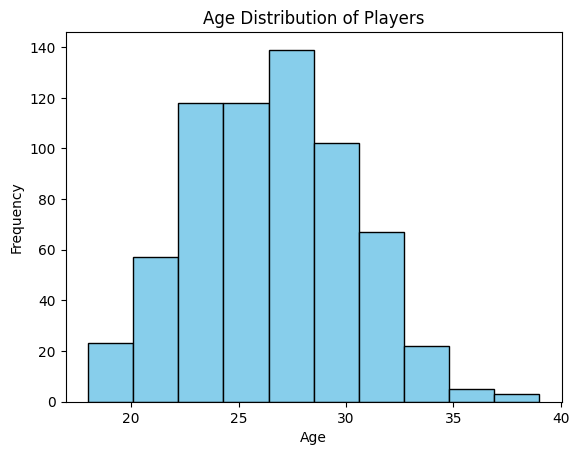

In [27]:
import matplotlib.pyplot as plt

df['Age'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


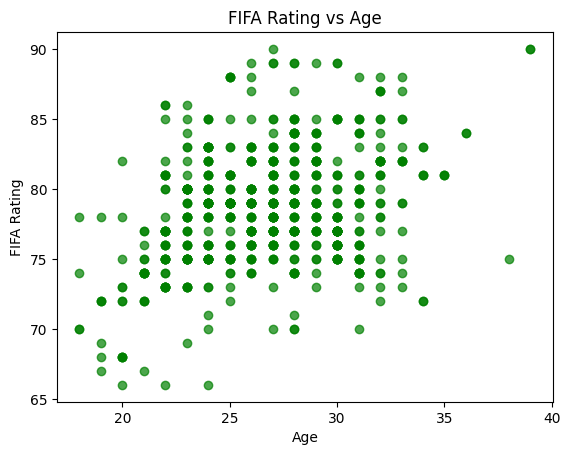

In [28]:
plt.scatter(df['Age'], df['FIFA rating'], color='green', alpha=0.7)
plt.title('FIFA Rating vs Age')
plt.xlabel('Age')
plt.ylabel('FIFA Rating')
plt.show()

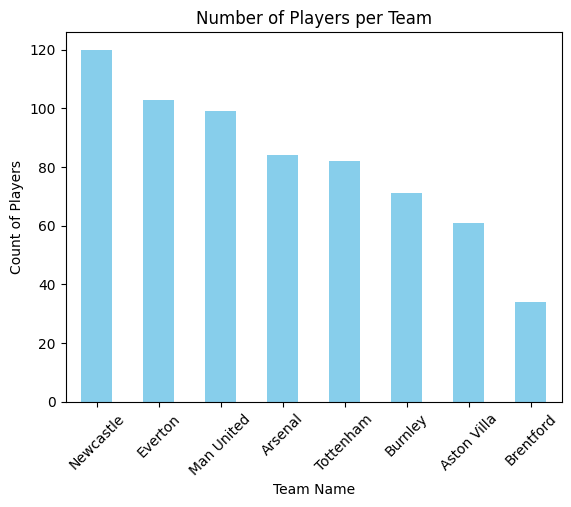

In [29]:
df['Team Name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Players per Team')
plt.xlabel('Team Name')
plt.ylabel('Count of Players')
plt.xticks(rotation=45)
plt.show()


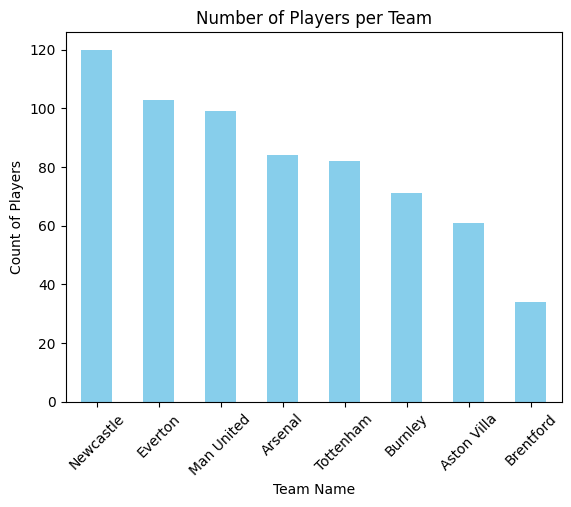

In [30]:
df['Team Name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Players per Team')
plt.xlabel('Team Name')
plt.ylabel('Count of Players')
plt.xticks(rotation=45)
plt.show()


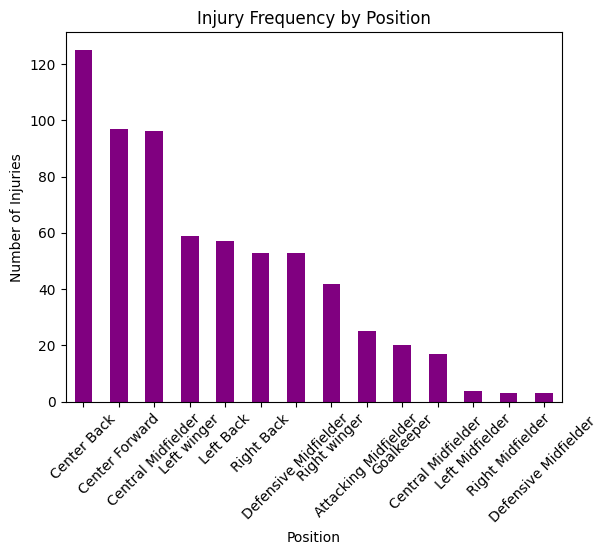

In [31]:
df['Position'].value_counts().plot(kind='bar', color='purple')
plt.title('Injury Frequency by Position')
plt.xlabel('Position')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()


<ipython-input-32-6701c00ff3eb>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date of Injury'] = pd.to_datetime(df['Date of Injury'], errors='coerce', infer_datetime_format=True)
<ipython-input-32-6701c00ff3eb>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date of return'] = pd.to_datetime(df['Date of return'], errors='coerce', infer_datetime_format=True)


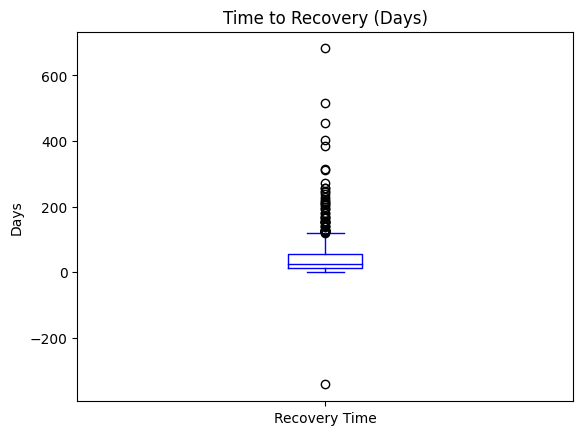

In [32]:
df['Date of Injury'] = pd.to_datetime(df['Date of Injury'], errors='coerce', infer_datetime_format=True)
df['Date of return'] = pd.to_datetime(df['Date of return'], errors='coerce', infer_datetime_format=True)
df['Recovery Time'] = (df['Date of return'] - df['Date of Injury']).dt.days
df = df.dropna(subset=['Recovery Time'])
df['Recovery Time'].plot(kind='box', color='blue')
plt.title('Time to Recovery (Days)')
plt.ylabel('Days')
plt.show()


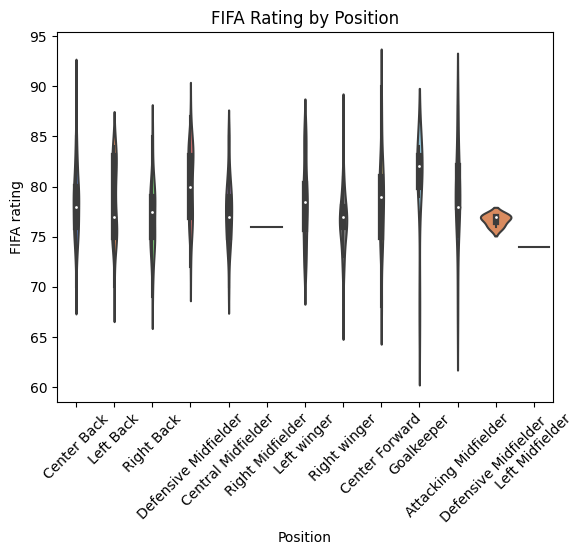

In [33]:
import seaborn as sns

sns.violinplot(x='Position', y='FIFA rating', data=df, palette='muted')
plt.title('FIFA Rating by Position')
plt.xticks(rotation=45)
plt.show()


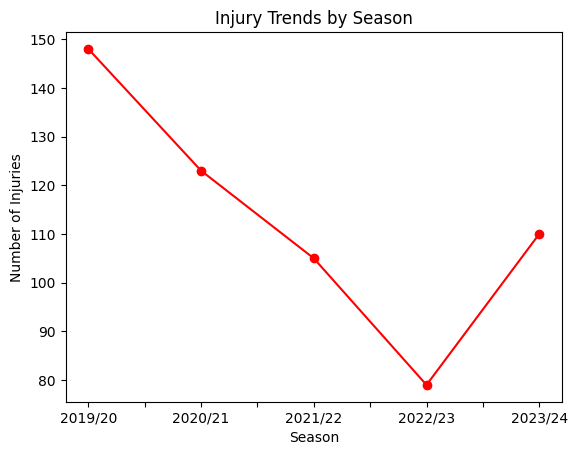

In [34]:
df.groupby('Season').size().plot(kind='line', marker='o', color='red')
plt.title('Injury Trends by Season')
plt.xlabel('Season')
plt.ylabel('Number of Injuries')
plt.show()
